<a href="https://colab.research.google.com/github/jucelia-ss/previsao_crimes/blob/main/Forecast_ocorrencia_crime_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar as bibliotecas

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg #tsa = time series analysis
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


Importar o dataset atraves da url para analise

In [42]:

url = 'https://dados.mj.gov.br/dataset/210b9ae2-21fc-4986-89c6-2006eb4db247/resource/feeae05e-faba-406c-8a4a-512aec91a9d1/download/indicadoressegurancapublicauf.xlsx'


Importar o arquivo para uma variavel chamada 'df'

In [43]:
df = pd.read_excel(url, sheet_name='Ocorrências')

#xls = pd.ExcelFile(url)

#xls.sheet_names  # see all sheet names

#df1 = pd.read_excel(xls, 'Ocorrências')
#df2 = pd.read_excel(xls, 'Vítimas')


Verificar os dados do dataset

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23020 entries, 0 to 23019
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   UF           23020 non-null  object
 1   Tipo Crime   23020 non-null  object
 2   Ano          23020 non-null  int64 
 3   Mês          23020 non-null  object
 4   Ocorrências  23020 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 899.3+ KB


Criar uma coluna chamada 'Meses'

In [45]:
meses = {
    'janeiro': 1,
    'fevereiro': 2,
    'março': 3,
    'abril': 4,
    'maio': 5,
    'junho': 6,
    'julho': 7,
    'agosto': 8,
    'setembro': 9,
    'outubro': 10,
    'novembro': 11,
    'dezembro': 12
}
df['Mês Numérico'] = df['Mês'].map(meses)


Verificando a coluna 'Mês'

In [46]:
df

,UF,Tipo Crime,Ano,Mês,Ocorrências,Mês Numérico
0,Acre,Estupro,2022,janeiro,31,1
1,Acre,Furto de veículo,2022,janeiro,50,1
2,Acre,Homicídio doloso,2022,janeiro,10,1
3,Acre,Lesão corporal seguida de morte,2022,janeiro,1,1
4,Acre,Roubo a instituição financeira,2022,janeiro,0,1
...,...,...,...,...,...,...
23015,Tocantins,Roubo a instituição financeira,2015,dezembro,6,12
23016,Tocantins,Roubo de carga,2015,dezembro,1,12
23017,Tocantins,Roubo de veículo,2015,dezembro,55,12
23018,Tocantins,Roubo seguido de morte (latrocínio),2015,dezembro,2,12


Criar uma nova coluna chamada 'Data' apartir da  combinação das colunas 'Ano' e 'Mês'

In [47]:
#df['Data'] = pd.to_datetime(df['Ano'].astype(str) + '-' + df['Mês Numérico'].astype(str) + '-01')
df['Data'] = pd.to_datetime(df['Ano'].astype(str) + '-' + df['Mês Numérico'].astype(str))



Verificar a coluna criada  dataset



In [48]:
df


,UF,Tipo Crime,Ano,Mês,Ocorrências,Mês Numérico,Data
0,Acre,Estupro,2022,janeiro,31,1,2022-01-01
1,Acre,Furto de veículo,2022,janeiro,50,1,2022-01-01
2,Acre,Homicídio doloso,2022,janeiro,10,1,2022-01-01
3,Acre,Lesão corporal seguida de morte,2022,janeiro,1,1,2022-01-01
4,Acre,Roubo a instituição financeira,2022,janeiro,0,1,2022-01-01
...,...,...,...,...,...,...,...
23015,Tocantins,Roubo a instituição financeira,2015,dezembro,6,12,2015-12-01
23016,Tocantins,Roubo de carga,2015,dezembro,1,12,2015-12-01
23017,Tocantins,Roubo de veículo,2015,dezembro,55,12,2015-12-01
23018,Tocantins,Roubo seguido de morte (latrocínio),2015,dezembro,2,12,2015-12-01


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23020 entries, 0 to 23019
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   UF            23020 non-null  object        
 1   Tipo Crime    23020 non-null  object        
 2   Ano           23020 non-null  int64         
 3   Mês           23020 non-null  object        
 4   Ocorrências   23020 non-null  int64         
 5   Mês Numérico  23020 non-null  int64         
 6   Data          23020 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.2+ MB


In [50]:
df

,UF,Tipo Crime,Ano,Mês,Ocorrências,Mês Numérico,Data
0,Acre,Estupro,2022,janeiro,31,1,2022-01-01
1,Acre,Furto de veículo,2022,janeiro,50,1,2022-01-01
2,Acre,Homicídio doloso,2022,janeiro,10,1,2022-01-01
3,Acre,Lesão corporal seguida de morte,2022,janeiro,1,1,2022-01-01
4,Acre,Roubo a instituição financeira,2022,janeiro,0,1,2022-01-01
...,...,...,...,...,...,...,...
23015,Tocantins,Roubo a instituição financeira,2015,dezembro,6,12,2015-12-01
23016,Tocantins,Roubo de carga,2015,dezembro,1,12,2015-12-01
23017,Tocantins,Roubo de veículo,2015,dezembro,55,12,2015-12-01
23018,Tocantins,Roubo seguido de morte (latrocínio),2015,dezembro,2,12,2015-12-01


Criação de um novo dataset chamado 'df_ocorrencias'



In [51]:
df_ocorrencias = df[['Data', 'Ocorrências', 'Tipo Crime', 'UF']]

Criação de um novo dataset chamado 'df_ocorrencias_crime'

In [52]:
df_ocorrencias_crime = df_ocorrencias.groupby(['Tipo Crime', 'Data' ]).sum()



<ipython-input-52-1e5611fb8897>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ocorrencias_crime = df_ocorrencias.groupby(['Tipo Crime', 'Data' ]).sum()


Visualização das vinte primeiras linhas do dataset   'df_ocorrencias_crime'

---



In [53]:
df_ocorrencias_crime.head(20)

Ocorrências
Tipo Crime Data                   
Estupro    2015-01-01         3954
           2015-02-01         3305
           2015-03-01         3919
           2015-04-01         3542
           2015-05-01         3470
           2015-06-01         3412
           2015-07-01         3426
           2015-08-01         3714
           2015-09-01         3697
           2015-10-01         3922
           2015-11-01         3659
           2015-12-01         3571
           2016-01-01         4045
           2016-02-01         3614
           2016-03-01         3977
           2016-04-01         3604
           2016-05-01         3615
           2016-06-01         3894
           2016-07-01         3856
           2016-08-01         4261

# **Análise de ocorrências por tipo de crime**

Transformar o df_ocorrencias_crime em uma tabela dinamica apartir das colunas 'Data', 'Ocorrencia', 'Tipo de crime' e 'UF'   




In [54]:

#df2 = df_ocorrencias_crime.pivot(index='Data', columns='Tipo Crime', values='Ocorrências')
df_ocorrencias_crime =pd.pivot_table(df_ocorrencias_crime, values = 'Ocorrências', index=['Data'], columns = 'Tipo Crime').reset_index()
df_ocorrencias_crime = df_ocorrencias_crime.set_index('Data')

Visualização do dataset  'df_ocorrencias_crime'

In [55]:
df_ocorrencias_crime

Tipo Crime,Estupro,Furto de veículo,Homicídio doloso,Lesão corporal seguida de morte,Roubo a instituição financeira,Roubo de carga,Roubo de veículo,Roubo seguido de morte (latrocínio),Tentativa de homicídio
Data,,,,,,,,,
2015-01-01,3954,23123,4669,60,111,1779,20992,194,4323
2015-02-01,3305,21381,3982,51,115,1445,18359,158,3550
2015-03-01,3919,23691,4320,50,112,1741,20597,178,3930
2015-04-01,3542,22030,4132,49,112,1503,19776,173,3697
2015-05-01,3470,22202,4007,59,82,1579,19237,180,3590
...,...,...,...,...,...,...,...,...,...
2022-08-01,5368,18273,2879,54,21,1042,11268,92,2552
2022-09-01,5386,19265,3012,57,18,1019,11519,113,2604
2022-10-01,5571,19601,3326,61,16,1084,12590,85,3023


Plotar um grafico mostrando a evolução das ocorrencias de variados tipos de crimes ao decorrer do tempo



[]

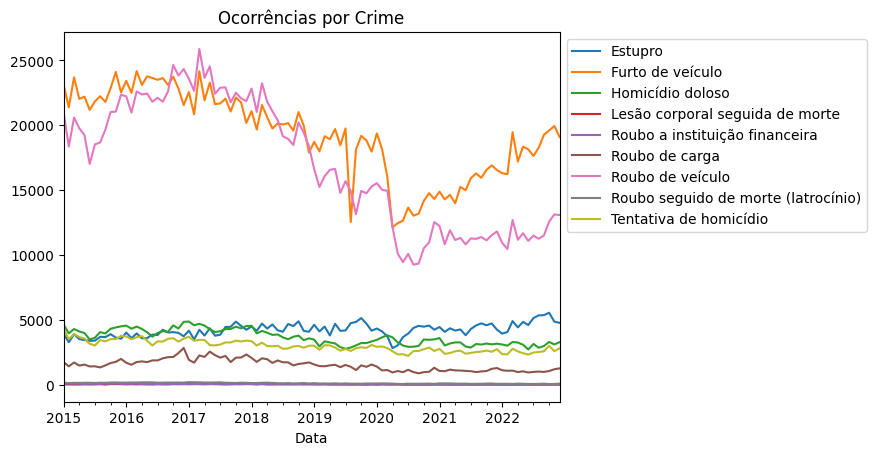

In [56]:
graph_crime = df_ocorrencias_crime.plot.line()

graph_crime.set_title("Ocorrências por Crime",color='black')
graph_crime.legend(bbox_to_anchor=(1.0, 1.0))
graph_crime.plot()

# **Análise de ocorrências por UF**

Agrupar cada tipo de ocorrencias por estado

In [57]:
df_ocorrencias_UF = df_ocorrencias.groupby(['UF', 'Data' ]).sum()


<ipython-input-57-e7e0b5803ca5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ocorrencias_UF = df_ocorrencias.groupby(['UF', 'Data' ]).sum()


In [58]:
df_ocorrencias_UF

Ocorrências
UF        Data                   
Acre      2015-01-01           21
          2015-02-01           20
          2015-03-01           24
          2015-04-01           28
          2015-05-01           21
...                           ...
Tocantins 2022-08-01          221
          2022-09-01          224
          2022-10-01          244
          2022-11-01          224
          2022-12-01          206

[2592 rows x 1 columns]

Criar uma tabela dinâmica a partir do dataframe "df_ocorrencias_UF", organizando as ocorrências de acordo com a data e UF.                           Definir a coluna "Data" como o índice do dataframe

In [59]:
df_ocorrencias_UF =pd.pivot_table(df_ocorrencias_UF, values = 'Ocorrências', index=['Data'], columns = 'UF').reset_index()
df_ocorrencias_UF = df_ocorrencias_UF.set_index('Data')

Plotar um grafico das ocorrencias por estado

[]

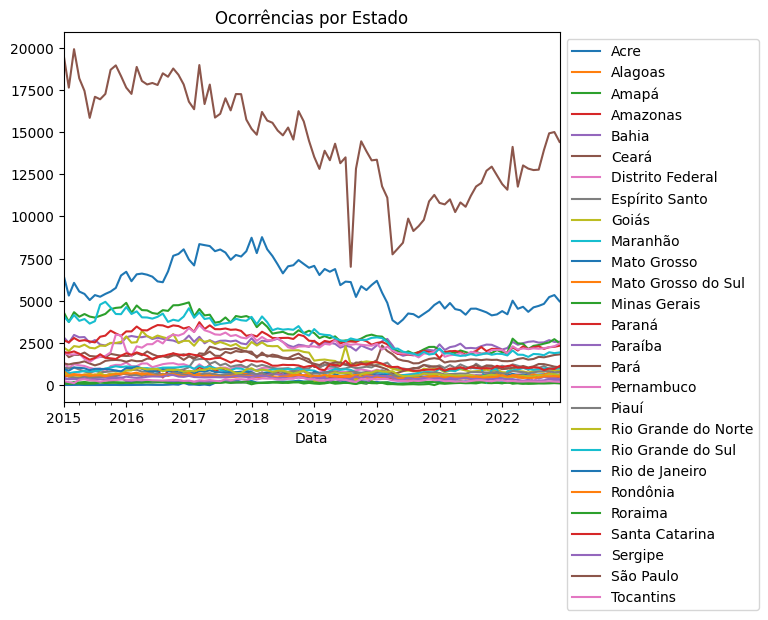

In [60]:
#df_ocorrencias_UF.plot()
graph_UF = df_ocorrencias_UF.plot.line()

graph_UF.set_title("Ocorrências por Estado",color='black')
graph_UF.legend(bbox_to_anchor=(1.0, 1.0))
graph_UF.plot()

In [61]:
df_ocorrencias_UF

UF,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
Data,,,,,,,,,,,,,,,,,,,,,
2015-01-01,21,645,179,542,2858,2028,1357,1071,2242,890,...,647,735,4112,6517,572,110,1954,458,19592,257
2015-02-01,20,518,127,592,2516,1666,1025,998,2036,714,...,516,568,3749,5317,565,84,1930,365,17632,192
2015-03-01,24,586,191,619,2985,1804,1252,1056,2325,777,...,472,608,4164,6070,626,120,2009,368,19908,130
2015-04-01,28,571,170,635,2844,1809,1189,937,2276,798,...,425,571,3821,5556,606,108,1871,341,18182,334
2015-05-01,21,529,199,597,2859,1941,1147,818,2408,850,...,518,648,3925,5414,613,92,1687,405,17437,358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,170,499,111,509,2530,1687,522,1029,821,945,...,824,608,1842,4705,464,210,1049,279,12773,221
2022-09-01,192,532,107,552,2545,1660,505,1142,804,1005,...,839,562,1783,4825,533,183,906,298,13932,224
2022-10-01,197,580,117,493,2677,1726,592,970,931,999,...,832,660,1958,5227,531,194,997,363,14926,244


Ocorrências na região sudeste





<Figure size 1500x800 with 0 Axes>

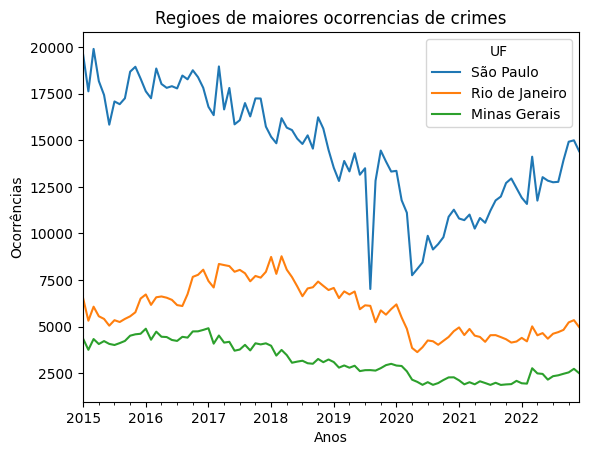

In [62]:
figura = plt.figure(figsize=(15,8))
df_ocorrencias_UF[["São Paulo", "Rio de Janeiro", "Minas Gerais"]].plot()
plt.xlabel("Anos")
plt.ylabel("Ocorrências")
plt.title('Regioes de maiores ocorrencias de crimes')
plt.show()


# **Análise de todos os crimes no país**

Agrupar o dataframe "df_ocorrencias" pela coluna "Data" e somar as ocorrências de todos os tipos de crime para cada data.

In [63]:
df_ocorrencias_pais = df_ocorrencias.groupby(['Data']).sum('Ocorrências')

In [64]:
df_ocorrencias_pais

,Ocorrências
Data,
2015-01-01,59205
2015-02-01,52346
2015-03-01,58538
2015-04-01,55014
2015-05-01,54406
...,...
2022-08-01,41549
2022-09-01,42993
2022-10-01,45357


In [65]:
df_ocorrencias_pais.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2015-01-01 to 2022-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Ocorrências  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


Plotar as ocorrencias acontecidas em todo país com o decorrer dos anos





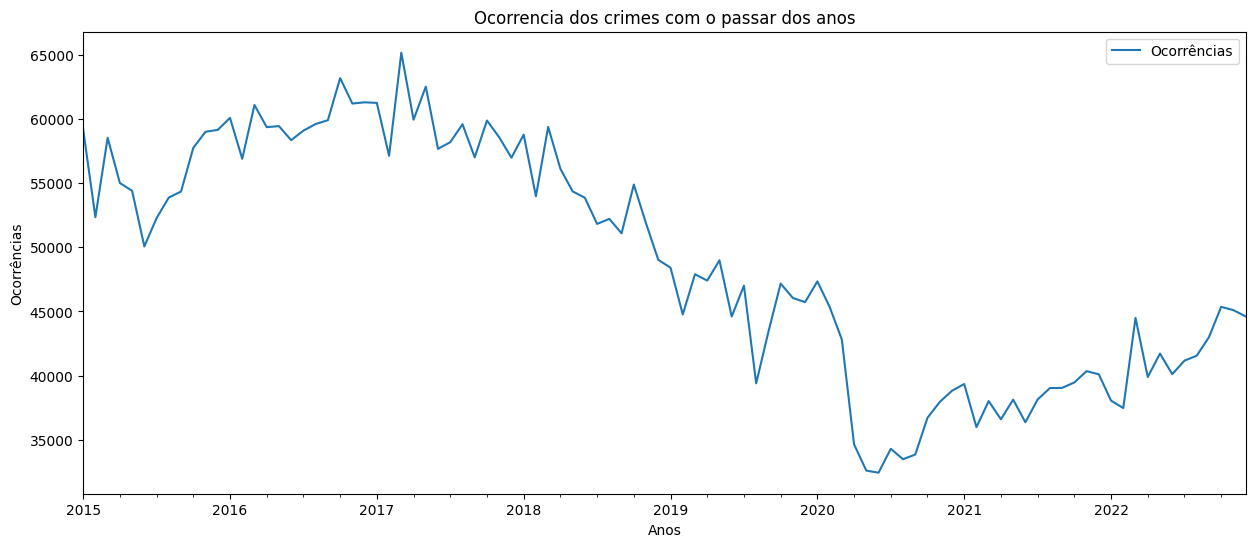

In [66]:
df_ocorrencias_pais.plot(figsize= (15,6))
plt.xlabel("Anos")
plt.ylabel("Ocorrências")
plt.title('Ocorrencia dos crimes com o passar dos anos')
plt.show()


Calcular a média móvel de 12 meses das ocorrências de crimes no país

In [67]:
df_ocorrencias_pais.Ocorrências.rolling(12).mean()
#Nan - valores nulos; média movel só é calculada a partir do 13° mes

Data
2015-01-01             NaN
2015-02-01             NaN
2015-03-01             NaN
2015-04-01             NaN
2015-05-01             NaN
                  ...     
2022-08-01    40282.000000
2022-09-01    40611.416667
2022-10-01    41102.416667
2022-11-01    41498.666667
2022-12-01    41875.250000
Name: Ocorrências, Length: 96, dtype: float64

Plotar um gráfico de linha com a média móvel de 12 meses das ocorrências de crimes no país

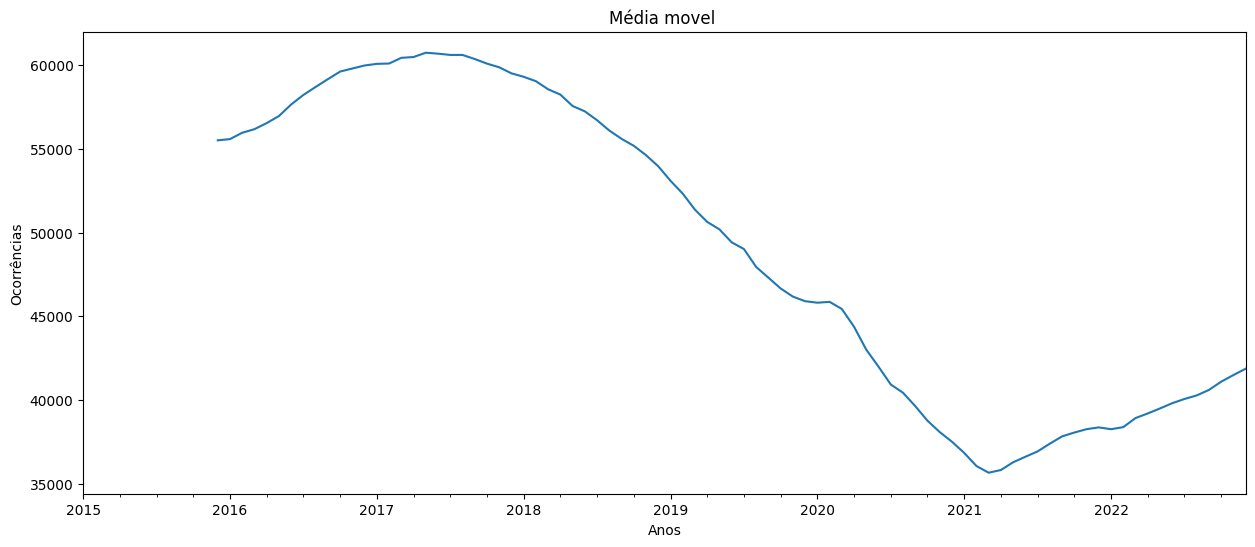

In [68]:
df_ocorrencias_pais.Ocorrências.rolling(12).mean().plot(figsize= (15,6))
plt.xlabel("Anos")
plt.ylabel("Ocorrências")
plt.title('Média movel ')
plt.show()

Analisar a evolução das ocorrências criminais ao longo dos anos em nível nacional

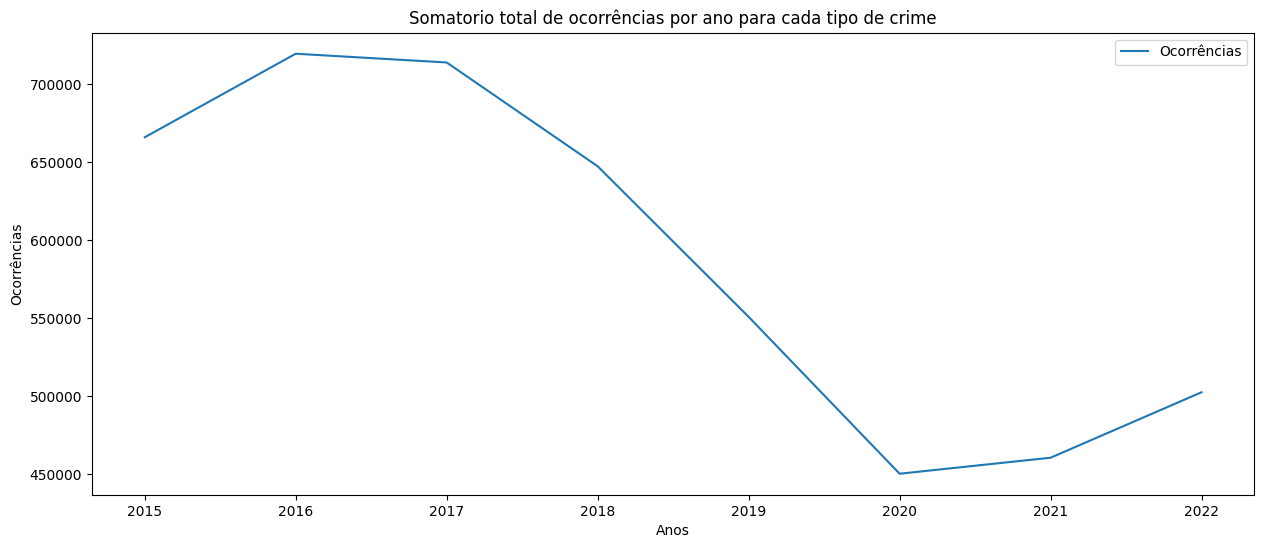

In [69]:
df_ocorrencias_pais.groupby(df_ocorrencias_pais.index.year).sum().plot(figsize= (15,6))
plt.xlabel("Anos")
plt.ylabel("Ocorrências")
plt.title('Somatorio total de ocorrências por ano para cada tipo de crime')
plt.show()

Calcular a diferença entre as ocorrências criminais de um ano e o ano anterior para cada estado (UF).

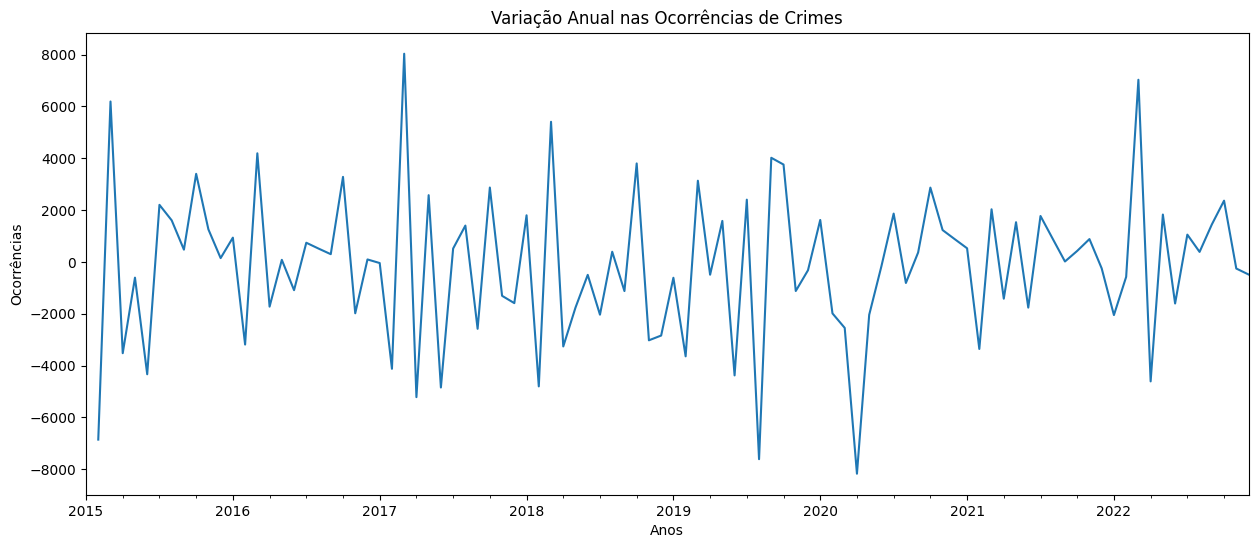

In [70]:
df_ocorrencias_pais.Ocorrências.diff().plot(figsize= (15,6))
plt.xlabel("Anos")
plt.ylabel("Ocorrências")
plt.title('Variação Anual nas Ocorrências de Crimes')
plt.show()

Criar um DataFrame chamado "index" com os valores das colunas "Data" e "UF" do dataframe "df_ocorrencias_pais"

Retornar o índice do DataFrame 'df_ocorrencias_pais'.

In [71]:
df_ocorrencias_pais.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

# **Análise entre 2015 e 2020**

Gerar gráfico da mudança ano a ano no número de ocorrências entre os anos de 2015 e 2020.

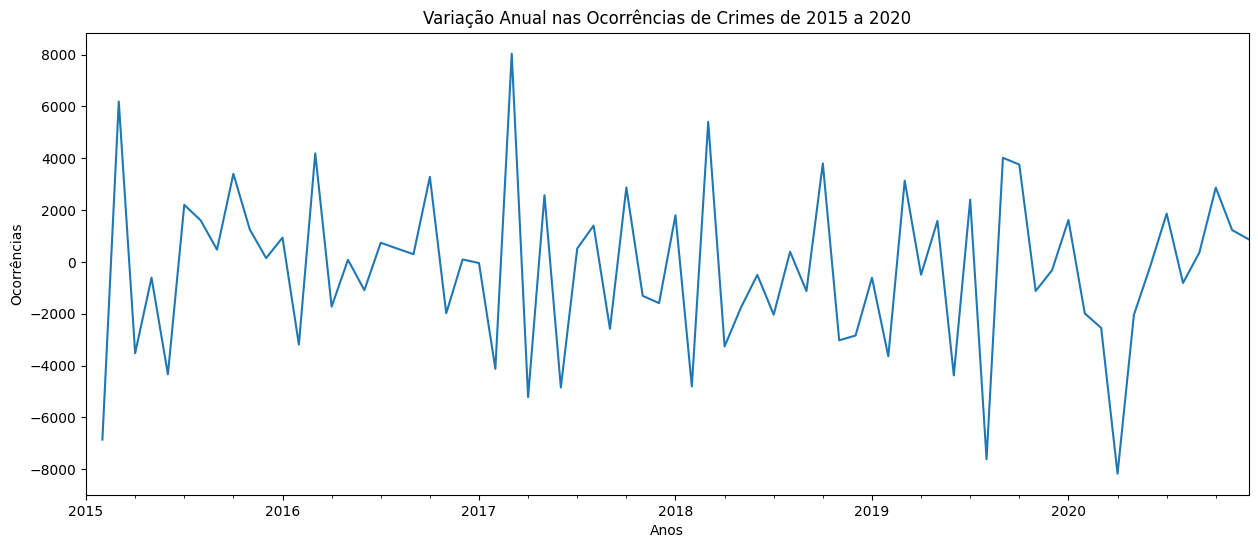

In [72]:
filtro = (df_ocorrencias_pais.index.year  >=2015 ) & (df_ocorrencias_pais.index.year <= 2020 )
df_ocorrencias_pais[filtro].Ocorrências.diff().plot(figsize= (15,6))
plt.xlabel("Anos")
plt.ylabel("Ocorrências")
plt.title('Variação Anual nas Ocorrências de Crimes de 2015 a 2020')
plt.show()

# Análise de variação por mês

Gerar um gráfico de barras da mudança média mensal no número de ocorrências pela diferença entre os valores consecutivos na coluna Ocorrencias .

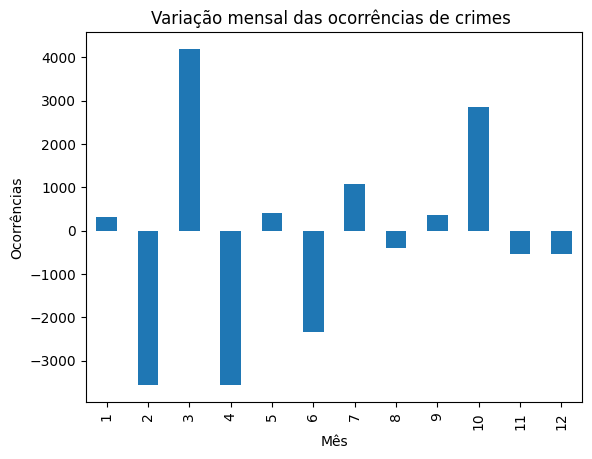

In [73]:
df_ocorrencias_pais.Ocorrências.diff().groupby(df_ocorrencias_pais.index.month).mean().plot(kind='bar')
plt.xlabel("Mês")
plt.ylabel("Ocorrências")
plt.title('Variação mensal das ocorrências de crimes ')
plt.show()

# **Análise preditiva**


# Arima- Modelo Integrado Auto-Regressivo de Médias Moveis

O modelo de série temporal de média móvel integrada autorregressiva (ARIMA) é uma técnica amplamente utilizada para análise e previsão de dados.


*  **Autorregressão** (AR) : Auto regressão faz referencia à dependência linear entre uma observação atual e suas observações passadas.

* **Ordem derivada integral** (I)  A diferenciação é aplicada para tornar a série temporal estacionária, removendo tendências e padrões temporais sistemáticos.


* **Media Móvel** (MA) A componente de média móvel modela a relação entre uma observação e um erro residual de médias móveis anteriores.

 Os componentes citados acima são  especificado explicitamente no modelo por meio de parâmetros. Os parametros do  ARIMA(p, q, d) são substituídos por valores inteiros para indicar do modelo ARIMA específico.

Os parametros do modelo ARIMA:



*   **p** representa o número de termos autorregressivos.

*   **d** representa quantas vezes a série precisa ser diferenciada para se tornar estacionária.


*    **q** representa o número de termos da média móvel.






Podemos configurar o parametro d > 0 no modelo ARIMA (p,q,d) para conseguir  o calculo das diferenças sucessivas na serie, para transforma-la em estacionaria.

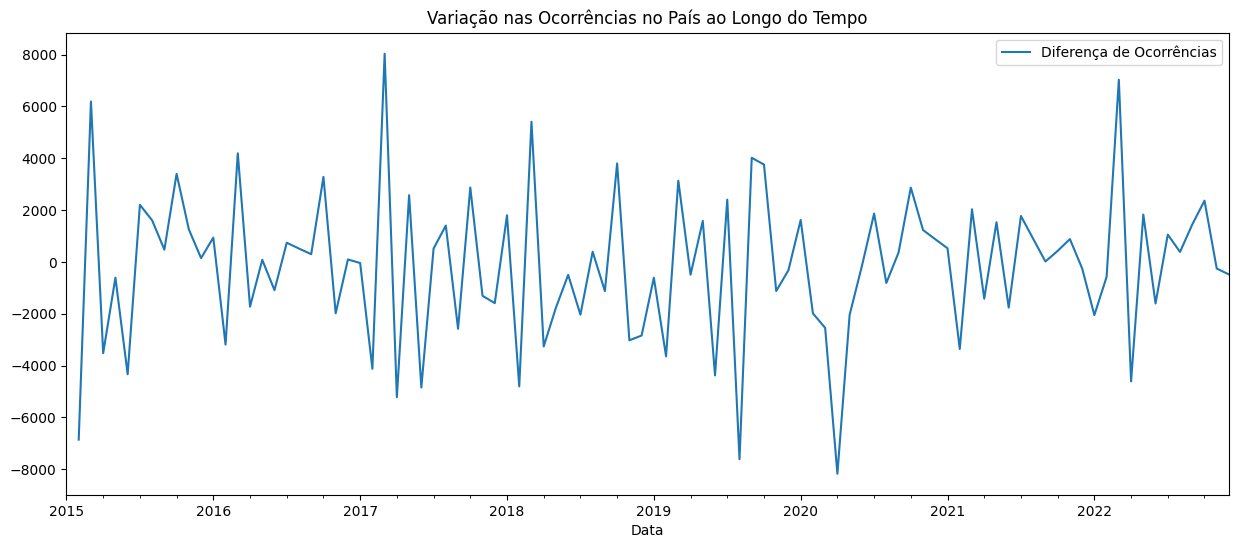

In [74]:
df_diff = df_ocorrencias_pais.Ocorrências.diff()
plt.figure(figsize=(15, 6))
df_diff.plot(label='Diferença de Ocorrências')
plt.legend()
plt.title('Variação nas Ocorrências no País ao Longo do Tempo')
plt.show()


Modelo


Para criar o modelo devemos importar o subpacote do statsmodels  classe arima, por meio desse comando ARIMA(Series,freq ='frequencia da serie', order=(p,q,d)).fit().                                    


Para o parametro order podemos utilizar essa configuração (5,1,2), que simboliza a componente autorregressiva com lag igual a 5,com uma diferença sucessiva com o objetivo de promover a estacinaridade da serie e 2 periodos  para componente de erros móveis .  

In [75]:
from statsmodels.tsa.arima.model import ARIMA
df_ocorrencias_pais.index = pd.to_datetime(df_ocorrencias_pais.index)
df_ocorrencias_pais = df_ocorrencias_pais.asfreq('MS')
arima = ARIMA(df_ocorrencias_pais.Ocorrências, order=(5, 1, 2)).fit()
media_residuos_quadrado = (arima.resid ** 2).mean()
print(media_residuos_quadrado)


42418170.94146448


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Treinamento do modelo ARIMA (5,1,2)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Erro Médio Absoluto (MAE): 2403.281065653477
Erro Médio Quadrático (MSE): 42418170.94146448
Raiz do Erro Médio Quadrático (RMSE): 6512.923379056787
Quantidade de Previsão para 01 de Janeiro de 2023: 45164.850522599496


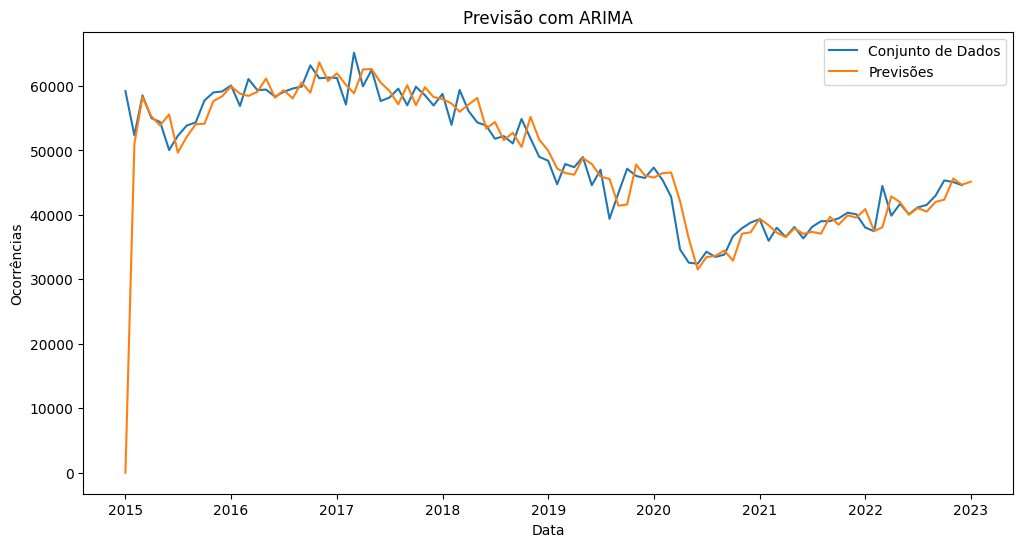

In [76]:
# datetime
df_ocorrencias_pais.index = pd.to_datetime(df_ocorrencias_pais.index)
#frequência mensal
df_ocorrencias_pais = df_ocorrencias_pais.asfreq('MS')

# Ajuste do modelo ARIMA
arima = ARIMA(df_ocorrencias_pais.Ocorrências, order=(5, 1, 2)).fit()

# previsões
previsoes = arima.predict(start=df_ocorrencias_pais.index[0], end='2023-01-01', typ='levels')

# Obter a quantidade de previsão para 01 de janeiro de 2023
quantidade_previsao = previsoes.iloc[-1]

# Calculando as métricas de erro para o conjunto de dados completo
# Não temos um conjunto de teste separado neste caso
# Portanto, estamos apenas calculando as métricas para o conjunto completo
# Erro Médio Absoluto (MAE)
mae = np.mean(np.abs(previsoes - df_ocorrencias_pais.Ocorrências))

# Erro Médio Quadrático (MSE)
mse = np.mean((previsoes - df_ocorrencias_pais.Ocorrências) ** 2)

# Raiz do Erro Médio Quadrático (RMSE)
rmse = np.sqrt(mse)

# Imprime as métricas
print("Erro Médio Absoluto (MAE):", mae)
print("Erro Médio Quadrático (MSE):", mse)
print("Raiz do Erro Médio Quadrático (RMSE):", rmse)

# Imprime a quantidade de previsão para 01 de janeiro de 2023
print("Quantidade de Previsão para 01 de Janeiro de 2023:", quantidade_previsao)

# Plote do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_ocorrencias_pais, label='Conjunto de Dados')
plt.plot(previsoes, label='Previsões')
plt.title('Previsão com ARIMA')
plt.xlabel('Data')
plt.ylabel('Ocorrências')
plt.legend()
plt.show()


Valores de erro para ARIMA (5,12)

In [77]:
from statsmodels.tsa.arima.model import ARIMA
df_ocorrencias_pais.index = pd.to_datetime(df_ocorrencias_pais.index)
df_ocorrencias_pais = df_ocorrencias_pais.asfreq('MS')
arima = ARIMA(df_ocorrencias_pais.Ocorrências, order=(5, 1, 2)).fit()
media_residuos_quadrado = (arima.resid ** 2).mean()
print(media_residuos_quadrado)
mae = np.mean(np.abs(previsoes - df_ocorrencias_pais.Ocorrências))
mse = np.mean((previsoes - df_ocorrencias_pais.Ocorrências) ** 2)
rmse = np.sqrt(mse)

print("Erro Médio Absoluto (MAE):", mae)
print("Erro Médio Quadrático (MSE):", mse)
print("Raiz do Erro Médio Quadrático (RMSE):", rmse)



42418170.94146448
Erro Médio Absoluto (MAE): 2403.281065653477
Erro Médio Quadrático (MSE): 42418170.94146448
Raiz do Erro Médio Quadrático (RMSE): 6512.923379056787


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


O erro residual esta considerendo as diferenças

Avaliação do modelo ARIMA(5,1,2)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Erro Médio Absoluto (MAE): 2643.6664829320357
Erro Médio Quadrático (MSE): 12176763.438034035
Raiz do Erro Médio Quadrático (RMSE): 3489.521949785391


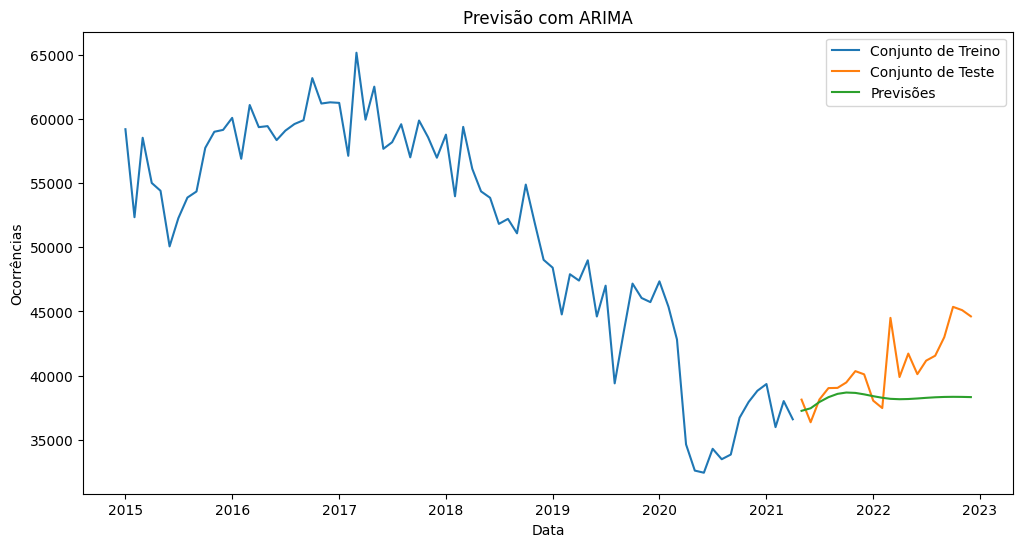

In [80]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Defina o índice como datetime
df_ocorrencias_pais.index = pd.to_datetime(df_ocorrencias_pais.index)

# Reamostrar para frequência mensal
df_ocorrencias_pais = df_ocorrencias_pais.asfreq('MS')

# Dividir os dados em conjunto de treino e teste (80% treino, 20% teste)
#train_size = int(len(df_ocorrencias_pais) * 0.8)
#treino = df_ocorrencias_pais[:train_size]
#teste = df_ocorrencias_pais[train_size:]

ar5_train_size = int(len(df_ocorrencias_pais) * 0.8)
ar5_treino = df_ocorrencias_pais[:ar5_train_size]
ar5_teste = df_ocorrencias_pais[ar5_train_size:]






# Ajuste do modelo ARIMA no conjunto de treino
arima = ARIMA(ar5_treino.Ocorrências, order=(5, 1, 2)).fit()

# Realize as previsões para o conjunto de teste
ar5_previsoes = arima.predict(start=ar5_teste.index[0], end=ar5_teste.index[-1], typ='levels')

# Calculando as métricas de erro para o conjunto de teste
# Erro Médio Absoluto (MAE)
mae = np.mean(np.abs(ar5_previsoes - ar5_teste.Ocorrências))

# Erro Médio Quadrático (MSE)
mse = np.mean((ar5_previsoes -ar5_teste.Ocorrências) ** 2)

# Raiz do Erro Médio Quadrático (RMSE)
rmse = np.sqrt(mse)

# Imprime as métricas
print("Erro Médio Absoluto (MAE):", mae)
print("Erro Médio Quadrático (MSE):", mse)
print("Raiz do Erro Médio Quadrático (RMSE):", rmse)

# Plote do gráfico
plt.figure(figsize=(12, 6))
plt.plot(ar5_treino, label='Conjunto de Treino')
plt.plot(ar5_teste, label='Conjunto de Teste')
plt.plot(ar5_previsoes, label='Previsões')
plt.title('Previsão com ARIMA')
plt.xlabel('Data')
plt.ylabel('Ocorrências')
plt.legend()
plt.show()


Previsão do modelo

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Defina o índice como datetime
df_ocorrencias_pais.index = pd.to_datetime(df_ocorrencias_pais.index)

# Reamostrar para frequência mensal
df_ocorrencias_pais = df_ocorrencias_pais.asfreq('MS')

# Dividir os dados em conjunto de treino e teste (80% treino, 20% teste)
tamanho_treino = int(len(df_ocorrencias_pais) * 0.8)
treino, teste = df_ocorrencias_pais[:tamanho_treino], df_ocorrencias_pais[tamanho_treino:]

# Ajuste do modelo ARIMA no conjunto de treino
arima = ARIMA(treino.Ocorrências, order=(5, 1, 2)).fit()

# Realize as previsões para o conjunto de teste
previsoes = arima.predict(start=teste.index[0], end=teste.index[-1], typ='levels')

# Calculando as métricas de erro para o conjunto de teste
# Erro Médio Absoluto (MAE)
mae = np.mean(np.abs(previsoes - teste.Ocorrências))

# Erro Médio Quadrático (MSE)
mse = np.mean((previsoes - teste.Ocorrências) ** 2)

# Raiz do Erro Médio Quadrático (RMSE)
rmse = np.sqrt(mse)

# Imprime as métricas
print("Erro Médio Absoluto (MAE):", mae)
print("Erro Médio Quadrático (MSE):", mse)
print("Raiz do Erro Médio Quadrático (RMSE):", rmse)

# Plote do gráfico
plt.figure(figsize=(12, 6))
plt.plot(treino, label='Conjunto de Treino')
plt.plot(teste, label='Conjunto de Teste')

plt.plot(previsoes, label='Previsões')
plt.title('Previsão com ARIMA')
plt.xlabel('Data')
plt.ylabel('Ocorrências')
plt.legend()
plt.show()


#  DEIXAR O CODIGO DUAS VEZES?

In [81]:
# ARIMA(Series, freq='frequencia da serie', order = (p_componente_regressivo, d_diferencas, q_medias_moveis)).fit()
arima = ARIMA(df_ocorrencias_pais.Ocorrências, freq = 'MS', order=(5,1,2)).fit()
(arima.resid ** 2).mean()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


42418170.94146448

In [82]:
df_ocorrencias_pais.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

Grafico do modelo ARIMA(5,1,2)


Gerar previsões do modelo com o comando predict(), por meio do parametro typ='levels' para reverter as diferenças sucessivas aplicadas.

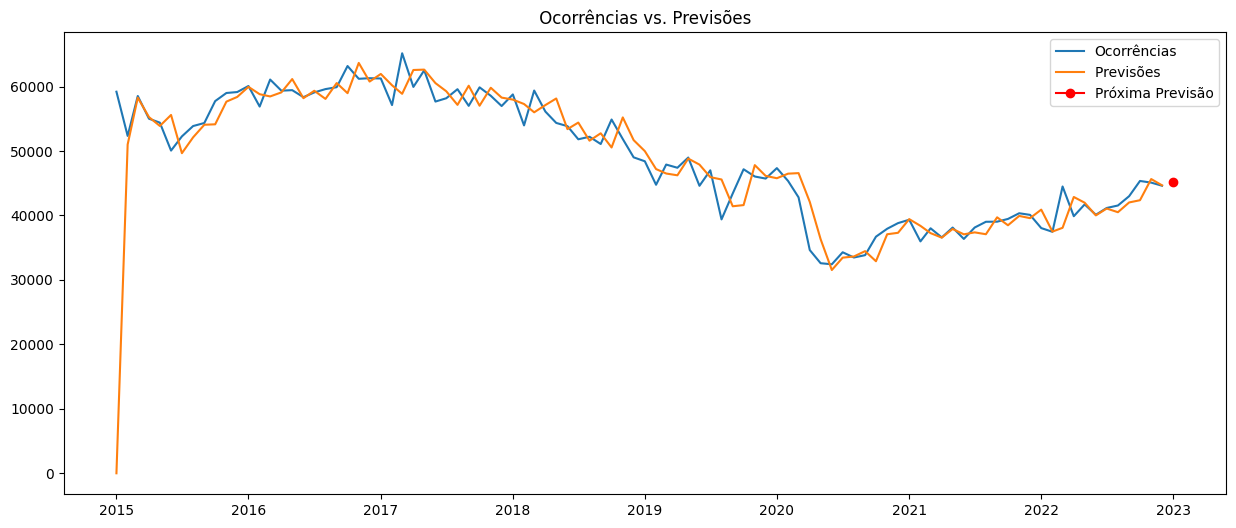

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

plt.plot(df_ocorrencias_pais.Ocorrências, label='Ocorrências')
plt.plot(arima.predict(typ='levels'), label='Previsões ')
plt.plot(arima.forecast().index[0], arima.forecast(), color='red', marker='o', label='Próxima Previsão')
plt.legend()
plt.title(' Ocorrências vs. Previsões ')
plt.show()


Fazer a previsão para o proximo periodo.

 O comando arima.forecast(), pode-se  obter uma estimativa dos valores futuros da série, juntamente com intervalos de confiança que indicam a incerteza associada às previsões.

In [ ]:
arima.forecast()

Gerar varias configuraçoes do modelo ARIMA para verificar os melhores ajustes com objetivo de encontrar a combinação que resulta no menor erro médio dos resíduos.

In [84]:
import warnings
from statsmodels.tsa.arima.model import ARIMA

orders = [(2, 0, 1), (3, 0, 1), (3, 0, 2), (2, 1, 1), (2, 1, 2), (3, 1, 1), (3, 1, 2), (3, 1, 3)]
menor_erro = float('inf')
melhor_ajuste = None

for order in orders:
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            model = ARIMA(df_ocorrencias_pais.Ocorrências, order=order).fit()
            error = (model.resid ** 2).mean()

            if error < menor_erro:
                menor_erro = error
                melhor_ajuste = order
    except:
        continue

print(f"Melhor modelo ARIMA parâmetros: {melhor_ajuste}, error: {menor_erro}")


Melhor modelo ARIMA parâmetros: (3, 0, 2), error: 7420150.7998924805


In [113]:
df_ocorrencias_pais

,Ocorrências
Data,
2015-01-01,59205
2015-02-01,52346
2015-03-01,58538
2015-04-01,55014
2015-05-01,54406
...,...
2022-08-01,41549
2022-09-01,42993
2022-10-01,45357


Avaliação do modelo ARIMA (3,0,2)

In [121]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Ajuste do índice e reamostragem para frequência mensal
df_ocorrencias_pais.index = pd.to_datetime(df_ocorrencias_pais.index)
df_ocorrencias_pais = df_ocorrencias_pais.asfreq('MS')

# Dividir os dados em conjunto de treino e teste (80% treino, 20% teste)
ar3_tamanho_treino = int(len(df_ocorrencias_pais) * 0.8)

ar3_treino= df_ocorrencias_pais[:ar3_tamanho_treino]
ar3_teste=  df_ocorrencias_pais[ar3_tamanho_treino:]


# Ajuste do modelo ARIMA no conjunto de treino
arima = ARIMA(ar3_treino.Ocorrências, order=(3, 0, 2)).fit()

# Previsões para o conjunto de teste
ar3_previsoes = arima.predict(start=ar3_teste.index[0], end=ar3_teste.index[-1], typ='levels')

# Métricas de erro para o conjunto de teste
# Erro Médio Absoluto (MAE)
mae = np.mean(np.abs(ar3_previsoes - ar3_teste.Ocorrências))
# Erro Médio Quadrático (MSE)
mse = np.mean((ar3_previsoes - ar3_teste.Ocorrências) ** 2)
# Raiz do Erro Médio Quadrático (RMSE)
rmse = np.sqrt(mse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Erro Médio Absoluto (MAE): 1210.0970221329444
Erro Médio Quadrático (MSE): 2330351.1368417856
Raiz do Erro Médio Quadrático (RMSE): 1526.548766611072


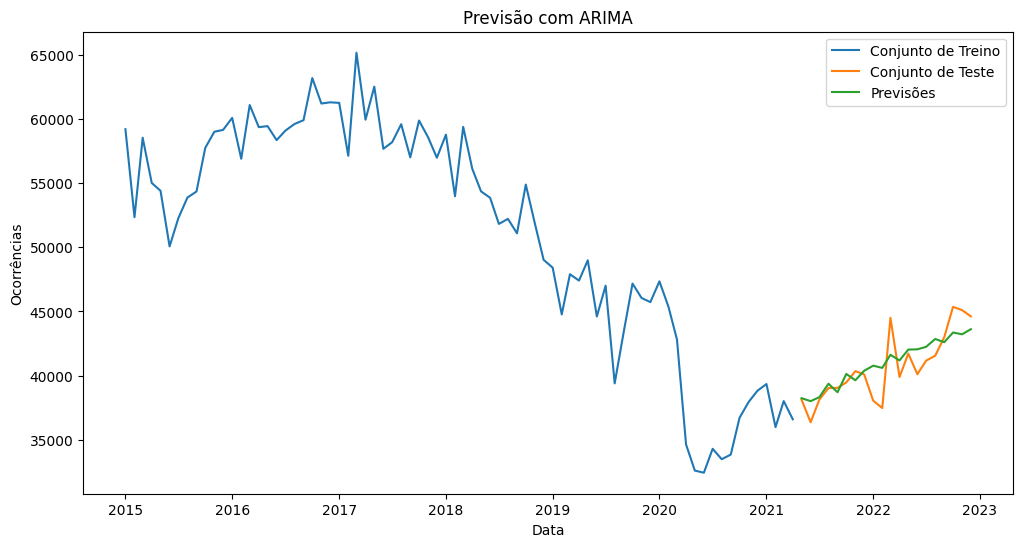

In [123]:
#Plotar os valores de erro
print("Erro Médio Absoluto (MAE):", mae)
print("Erro Médio Quadrático (MSE):", mse)
print("Raiz do Erro Médio Quadrático (RMSE):", rmse)

# Gráfico
plt.figure(figsize=(12, 6))
plt.plot(ar3_treino, label='Conjunto de Treino')
plt.plot(ar3_teste, label='Conjunto de Teste')
plt.plot(ar3_previsoes, label='Previsões')
plt.title('Previsão com ARIMA')
plt.xlabel('Data')
plt.ylabel('Ocorrências')
plt.legend()
plt.show()


#  Modelo Auto- Regressivo Sazonal de Medias Moveis Integrado (SARIMA)                                                    

Agrupar os dados por mês com o objetivo de verificar ha existencia de algum padrão de sazonalidade relacionado entre os meses do ano

Os modelos SARIMA (Seasonal AutoRegressive Integrated Moving Average) representam uma extensão dos modelos ARIMA para lidar com componentes sazonais em séries temporais.

O objetivo desse modelo é capturar padrões e variações que se repetem em intervalos fixos, como sazonalidades mensais ou anuais.

A sigla SARIMA é composta por três partes principais:
* "S" refere-se à sazonalidade,
* "AR" indica a parte autoregressiva.
* "MA" refere-se à parte de médias móveis.

Ao incorporar a sazonalidade, os modelos SARIMA incluem termos adicionais para representar os padrões recorrentes ao longo do tempo.

A ordem desses termos sazonais é denotada por (P, D, Q, s)
* "P" representa a ordem autoregressiva sazonal,
* "D" é a ordem de diferenciação sazonal
*  "Q" é a ordem da média móvel sazonal,
* "s" é o período sazonal.



analise de sazonalidade mensal


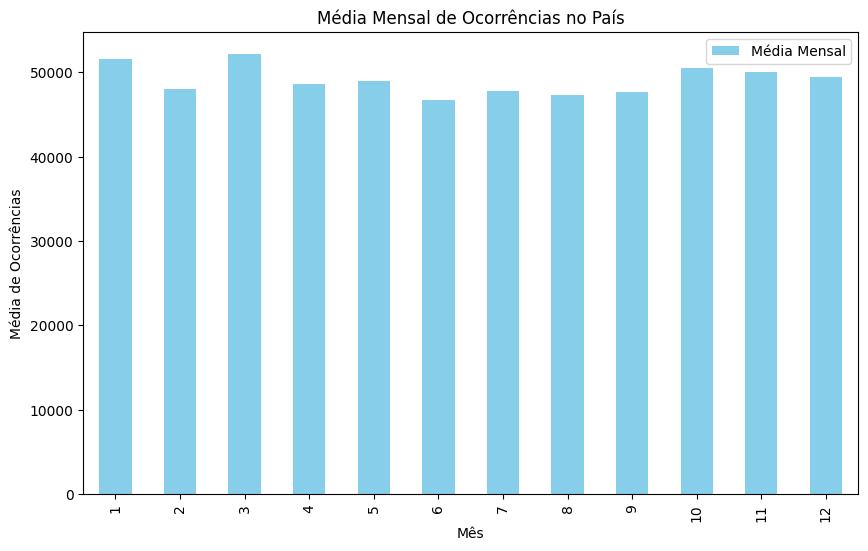

In [88]:
import matplotlib.pyplot as plt

# Substitua df_ocorrencias_pais.Ocorrências pelo seu próprio conjunto de dados
df_mean_monthly = df_ocorrencias_pais.Ocorrências.groupby(df_ocorrencias_pais.index.month).mean()

plt.figure(figsize=(10, 6))

# Plotando a média mensal em barras
df_mean_monthly.plot(kind='bar', color='skyblue', label='Média Mensal')

# Adicionando legenda ao gráfico
plt.legend()

# Adicionando título ao gráfico
plt.title('Média Mensal de Ocorrências no País')

# Adicionando rótulos aos eixos
plt.xlabel('Mês')
plt.ylabel('Média de Ocorrências')

# Exibindo o gráfico
plt.show()


Pode - se perceber pelo grafico que os meses possuem uma certa similaridade entre si, apenas o mes de março apresenta um leve pico em relação aos outros meses. Podemos usar um periodo de cinco anos , i.e.,s= 60 meses.  

Analise da autocorrelação parcial e total, para verificar a existencia de sazonalidade autocorrelacionada  

In [89]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf


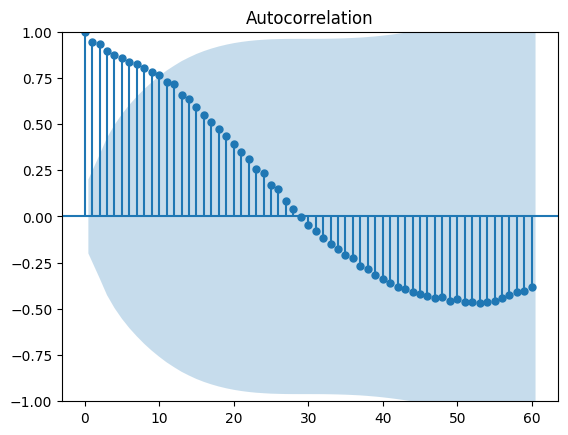

In [90]:
plot_acf(df_ocorrencias_pais.Ocorrências, lags=60 )
plt.show()

Grafico de autocorrelação parcial

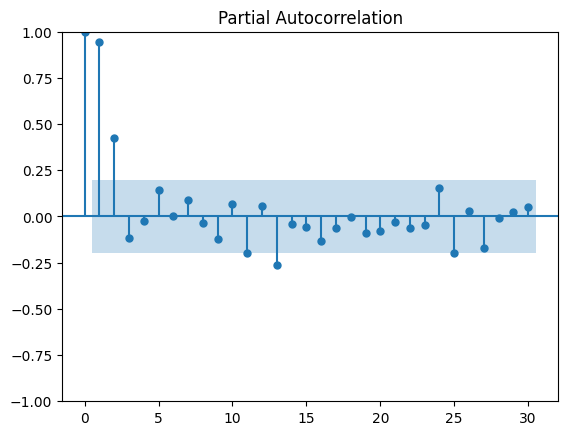

In [91]:
#pacf: partial autocorrelation function - - autocorrelação parcial
plot_pacf(df_ocorrencias_pais.Ocorrências, lags= 30)
plt.show()

Verificar a estacionaridade mensal

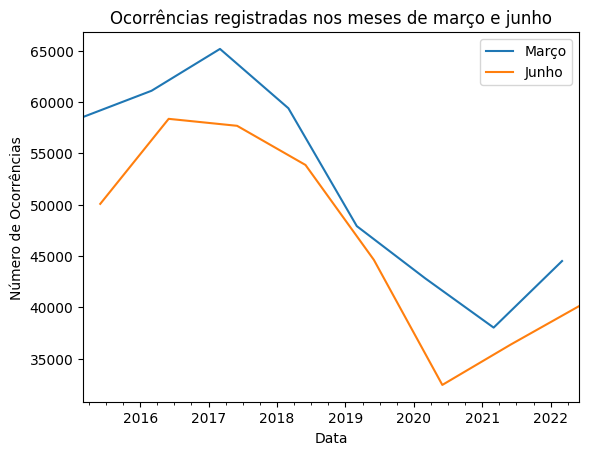

In [93]:
# Filtrar e plotar as ocorrências para o mês de março e junho
df_ocorrencias_pais[df_ocorrencias_pais.index.month == 3].Ocorrências.plot(label='Março')
df_ocorrencias_pais[df_ocorrencias_pais.index.month == 6].Ocorrências.plot(label='Junho')

# Adicionar título do  gráfico
plt.title('Ocorrências registradas nos meses de março e junho')

# Adicionar os nomes dos eixos x e y
plt.xlabel('Data')
plt.ylabel('Número de Ocorrências')
plt.legend()
plt.show()


Teste de Dickey-Fuller para verificar a estacionaridade da série

In [94]:
from statsmodels.tsa.stattools import adfuller

# Aplicando o teste de Dickey-Fuller aumentado
resultado_teste_marco = adfuller(df_ocorrencias_pais[df_ocorrencias_pais.index.month == 3].Ocorrências)
resultado_teste_junho = adfuller(df_ocorrencias_pais[df_ocorrencias_pais.index.month == 6].Ocorrências)

# Imprimindo os resultados
print('Resultado do teste para o mês de março:')
print('Estatística do teste:', resultado_teste_marco[0])
print('Valor-p:', resultado_teste_marco[1])
print('Valores críticos:')
for chave, valor in resultado_teste_marco[4].items():
    print(f'\t{chave}: {valor}')

print('\nResultado do teste para o mês de junho:')
print('Estatística do teste:', resultado_teste_junho[0])
print('Valor-p:', resultado_teste_junho[1])
print('Valores críticos:')
for chave, valor in resultado_teste_junho[4].items():
    print(f'\t{chave}: {valor}')


Resultado do teste para o mês de março:
Estatística do teste: -1.9290900665480404
Valor-p: 0.31850237186458086
Valores críticos:
	1%: -6.045114
	5%: -3.9292800000000003
	10%: -2.98681

Resultado do teste para o mês de junho:
Estatística do teste: -1.542477417388954
Valor-p: 0.5124035947038709
Valores críticos:
	1%: -6.045114
	5%: -3.9292800000000003
	10%: -2.98681


Com base nos resultados dos testes de Dickey-Fuller, os dois meses plotados apresentam valores  p  maiores que 0.05 sugerem a não estacionaridade da série.

Avaliação do modelo SARIMA

Utiizar a o SARIMA apartir da classe SARIMAX. Cada parametros de tendência p,q e d são configurados por meio do parametro order =(p,d,q) com os parametros de sazonalidade P,D,Q e s que são ajustados atraves do parametro seasonal_order =(P,D,Q,s)

O teste abaixo sera realizado com a configuração SARIMA(2,1,2)(3,1,2)12

In [95]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Ajuste do modelo SARIMA
sarima = SARIMAX(df_ocorrencias_pais.Ocorrências,
                 order=(2, 1, 2),
                 seasonal_order=(3, 1, 2, 12),
                 enforce_stationarity=False,
                 enforce_invertibility=False,
                 freq='MS').fit()

# Resíduos do modelo SARIMA
residuals = sarima.resid

# Cálculo das métricas de erro
mae = mean_absolute_error(df_ocorrencias_pais.Ocorrências, sarima.fittedvalues)
mse = mean_squared_error(df_ocorrencias_pais.Ocorrências, sarima.fittedvalues)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

print(sarima.summary())



/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error (MAE): 10552.281160657454
Mean Squared Error (MSE): 300846313.8771297
Root Mean Squared Error (RMSE): 17344.921846959405
                                     SARIMAX Results                                      
Dep. Variable:                        Ocorrências   No. Observations:                   96
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -926.495
Date:                            Sat, 03 Feb 2024   AIC                           1872.989
Time:                                    18:05:38   BIC                           1891.056
Sample:                                01-01-2015   HQIC                          1879.724
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3015: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse


Verificar a data da ultima ocorrência

In [97]:
#sarimax_forecast(sarima, periods=24)

df_ocorrencias_pais.Ocorrências.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [98]:
pd.date_range(df_ocorrencias_pais.Ocorrências.index[-1], periods=6, freq='MS')

DatetimeIndex(['2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01',
               '2023-04-01', '2023-05-01'],
              dtype='datetime64[ns]', freq='MS')

# **RETIRAR ESSA PARTE**

In [99]:
sarima.predict(n_periods=6)

Data
2015-01-01        0.000000
2015-02-01    60735.191919
2015-03-01    59695.468914
2015-04-01    58015.576448
2015-05-01    57435.132909
                  ...     
2022-08-01    51172.295867
2022-09-01    44521.540939
2022-10-01    41449.098726
2022-11-01    75165.800863
2022-12-01    58426.131176
Freq: MS, Name: predicted_mean, Length: 96, dtype: float64

# **Previsão para o proximo periodo desconhecido da serie por meio do comando forecast()**

In [100]:
sarima.forecast()

2023-01-01    138323.881588
Freq: MS, dtype: float64

# **RETIRAR ESSA PARTE**


**Previsão**

In [ ]:
df_ocorrencias_pais.index = pd.to_datetime(df_ocorrencias_pais.index)
# frequência mensal
df_ocorrencias_pais = df_ocorrencias_pais.asfreq('MS')
# Dividir os dados em conjunto de treino e teste (80% treino, 20% teste)
tamanho_treino = int(len(df_ocorrencias_pais) * 0.8)
treino, teste = df_ocorrencias_pais[:tamanho_treino], df_ocorrencias_pais[tamanho_treino:]
# Ajuste do modelo SARIMA no conjunto de treino
sarima = SARIMAX(treino.Ocorrências,
                 order=(2,1,2),
                 seasonal_order=(3,1,2,12),
                 enforce_stationarity=False,
                 enforce_invertibility=False,
                 freq='MS').fit()
# Previsões para o conjunto de teste
previsoes = sarima.predict(start=teste.index[0], end=teste.index[-1], dynamic=False)

# Calculando o erro para o conjunto de teste
erro = np.mean((previsoes - teste.Ocorrências) ** 2)
print('Erro:', erro)

# Resumo modelo SARIMA
print(sarima.summary())



Grafico do modelo criado

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(treino, label='Conjunto de Treino')
plt.plot(teste, label='Conjunto de Teste')
plt.plot(previsoes, label='Previsões')
plt.title('Previsão com SARIMA')
plt.xlabel('Data')
plt.ylabel('Ocorrências')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suponha que df_ocorrencias_pais seja seu DataFrame de dados

# Defina o índice como datetime
df_ocorrencias_pais.index = pd.to_datetime(df_ocorrencias_pais.index)

# Reamostrar para frequência mensal
df_ocorrencias_pais = df_ocorrencias_pais.asfreq('MS')

# Dividir os dados em conjunto de treino e teste (80% treino, 20% teste)
tamanho_treino = int(len(df_ocorrencias_pais) * 0.8)
treino, teste = df_ocorrencias_pais[:tamanho_treino], df_ocorrencias_pais[tamanho_treino:]

# Ajuste do modelo SARIMA no conjunto de treino
sarima = SARIMAX(treino.Ocorrências,
                 order=(2,1,2),
                 seasonal_order=(3,1,2,12),
                 enforce_stationarity=False,
                 enforce_invertibility=False,
                 freq='MS').fit()

# Realize as previsões para o conjunto de teste
previsoes = sarima.predict(start=teste.index[0], end=teste.index[-1], dynamic=False)

# Calculando o erro para o conjunto de teste
erro = np.mean((previsoes - teste.Ocorrências) ** 2)

# Imprime o erro
print('Erro:', erro)

# Imprime o resumo do modelo SARIMA
print(sarima.summary())

# Previsão de janeiro de 2023
previsao_janeiro_2023 = sarima.forecast(steps=1)[-1]

# Imprime a previsão de janeiro de 2023
print("Previsão de Ocorrências para Janeiro de 2023:", previsao_janeiro_2023)

# Plote do gráfico
plt.figure(figsize=(12, 6))
plt.plot(treino, label='Conjunto de Treino')
plt.plot(teste, label='Conjunto de Teste')
plt.plot(previsoes, label='Previsões')
plt.axhline(y=previsao_janeiro_2023, color='red', linestyle='--', label='Previsão Jan 2023')
plt.title('Previsão com SARIMA')
plt.xlabel('Data')
plt.ylabel('Ocorrências')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suponha que df_ocorrencias_pais seja seu DataFrame de dados
# Suponha que você tenha separado seus dados em X e y conforme indicado

# Defina o índice como datetime
df_ocorrencias_pais.index = pd.to_datetime(df_ocorrencias_pais.index)

# Reamostrar para frequência mensal
df_ocorrencias_pais = df_ocorrencias_pais.asfreq('MS')

# Separar os dados em conjuntos de treinamento e teste
train_size = int(len(df_ocorrencias_pais) * 0.8)
treino = df_ocorrencias_pais[:train_size]
teste = df_ocorrencias_pais[train_size:]

# Ajuste do modelo SARIMA no conjunto de treino
sarima = SARIMAX(treino.Ocorrências,
                 order=(2,1,2),
                 seasonal_order=(3,1,2,12),
                 enforce_stationarity=False,
                 enforce_invertibility=False,
                 freq='MS').fit()

# Realize as previsões para o conjunto de teste
previsoes = sarima.predict(start=teste.index[0], end=teste.index[-1], dynamic=False)

# Calculando o erro para o conjunto de teste
erro = np.mean((previsoes - teste.Ocorrências) ** 2)

# Imprime o erro
print('Erro:', erro)
# Definindo o tamanho da figura
plt.figure(figsize=(15,6))

# Plotando as ocorrências reais
plt.plot(df_ocorrencias_pais.Ocorrências, label='Ocorrências Reais')

# Plotando as previsões SARIMA
plt.plot(sarima.predict(typ='levels'), label='Previsões SARIMA')

# Plotando a previsão ARIMA
plt.plot(sarima.forecast().index[0], arima.forecast(), color='red', label='Previsão ARIMA')

# Adicionando título ao gráfico
plt.title('Comparação entre Ocorrências Reais e Previsões')

# Adicionando rótulos aos eixos x e y
plt.xlabel('Data')
plt.ylabel('Número de Ocorrências')

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.show()


#TESTE

In [ ]:
#Corrigindo o índice para datetime
df_ocorrencias_pais.index = pd.to_datetime(df_ocorrencias_pais.index)

# Frequência mensal
df_ocorrencias_pais = df_ocorrencias_pais.asfreq('MS')

# Divisão dos dados em conjunto de treino e teste (80% treino, 20% teste)
tamanho_treino = int(len(df_ocorrencias_pais) * 0.8)
treino, teste = df_ocorrencias_pais[:tamanho_treino], df_ocorrencias_pais[tamanho_treino:]

# Ajuste do modelo SARIMA no conjunto de treino
sarima = SARIMAX(treino.Ocorrências, order=(2,1,2), seasonal_order=(3,1,2,12),
                 enforce_stationarity=False, enforce_invertibility=False,
                 freq='MS').fit()


# Cálculo de erro para o conjunto de teste
erro_mae = mean_absolute_error(teste.Ocorrências, previsoes)
erro_mse = mean_squared_error(teste.Ocorrências, previsoes)
erro_rmse = np.sqrt(erro_mse)
print('Erro MAE:', erro_mae)
print('Erro MSE:', erro_mse)
print('Erro RMSE:', erro_rmse)

# Resumo do modelo SARIMA
print(sarima.summary())



Previsão para janeiro de 2023

In [ ]:
# Previsões para o conjunto de teste
previsoes = sarima.predict(start=teste.index[0], end=teste.index[-1], dynamic=False)
# Previsão de janeiro de 2023
previsao_janeiro_2023 = sarima.forecast(steps=1)[-1]

# Previsão de janeiro de 2023
print("Previsão de Ocorrências para Janeiro de 2023:", previsao_janeiro_2023)

In [ ]:
df_ocorrencias_pais.index = pd.to_datetime(df_ocorrencias_pais.index)

# Frequência mensal
df_ocorrencias_pais = df_ocorrencias_pais.asfreq('MS')

# Divisão os dados em conjunto de treino e teste (80% treino, 20% teste)
tamanho_treino = int(len(df_ocorrencias_pais) * 0.8)
treino, teste = df_ocorrencias_pais[:tamanho_treino], df_ocorrencias_pais[tamanho_treino:]

# Ajuste do modelo SARIMA no conjunto de treino
sarima = SARIMAX(treino.Ocorrências,
                 order=(2,1,2),
                 seasonal_order=(3,1,2,12),
                 enforce_stationarity=False,
                 enforce_invertibility=False,
                 freq='MS').fit()

# Previsões para o conjunto de teste
previsoes = sarima.predict(start=teste.index[0], end=teste.index[-1], dynamic=False)

# Calculo de erro para o conjunto de teste
erro_mae = mean_absolute_error(teste.Ocorrências, previsoes)
erro_mse = mean_squared_error(teste.Ocorrências, previsoes)
erro_rmse = np.sqrt(erro_mse)
print('Erro MAE:', erro_mae)
print('Erro MSE:', erro_mse)
print('Erro RMSE:', erro_rmse)

# Resumo do modelo SARIMA
print(sarima.summary())

# Previsão de janeiro de 2023
previsao_janeiro_2023 = sarima.forecast(steps=1)[-1]
print("Previsão de Ocorrências para Janeiro de 2023:", previsao_janeiro_2023)

# Gráfico
plt.figure(figsize=(12, 6))
plt.plot(treino, label='Conjunto de Treino')
plt.plot(teste, label='Conjunto de Teste')
plt.plot(previsoes, label='Previsões')
#plt.axhline(y=previsao_janeiro_2023, color='red', linestyle='--', label='Previsão Jan 2023')
plt.title('Previsão com SARIMA')
plt.xlabel('Data')
plt.ylabel('Ocorrências')
plt.legend()
plt.show()


#Previsão

In [ ]:
# Previsão de janeiro de 2023
previsao_janeiro_2023 = sarima.forecast(steps=1)[-1]

# Previsão de janeiro de 2023
print("Previsão de Ocorrências para Janeiro de 2023:", previsao_janeiro_2023)


# Decision Trees Regressor




Aplicação de modelos com variaveis exogenas


As analises anteriores foram realizadas apartir de dados com caracteristicas endogenas que são variáveis dependentes, o que significa que se correlacionam com outros fatores dependendo apenas das entradas dos dados  contidas nas serie temporal.                                                           

 No entanto devemos levar em consideração os efeitos externos da propria série com a intenção de melhorar o desempenho de cada modelo preditivo no caso as variaveis exógenas.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

Utilizar o dataset

In [ ]:
df_ocorrencias_pais

Para aplicar um modelo preditivo que inclua variáveis ​​exógenas, devemos primeiro definir  as variáveis ​​endógenas. Para séries temporais, as variáveis ​​endógenas são  valores anteriores ao período de interesse.


 Definir o número de variáveis ​​endógenas como o número de defasagens p. Este exemplo usa p = 5.       Apartir de uma copia do dataset def_ocorrencias_pais que possui a coluna ocorrencia, em sequencia por meio de um loop, iremos criar uma coluna para cada variavel endogena com auxilio do comando Series.shift(), com om o comando dropna iremos eliminar os valores vazios.

In [ ]:
p = 5
df1 = df_ocorrencias_pais[['Ocorrências']].copy()
for i in range(p):
  df1[f'x_{i+1}'] = df1.Ocorrências.shift(i+1)
df1.dropna(axis=0, inplace=True)
df1.head()

Apartir dos dados acima, desenvolver diversos modelos de regressão , para esse caso iremos utilizar o modelo regressivo do tipo de arvore de decisão.Esse modelo de regressão tem o input uma matriz de valores das variaveis de entradas X e um output  de  vetores da  valores y.  

In [ ]:
X = df1.drop('Ocorrências', axis=1) #axis=1 coluna axis=0 linha
y = df1.Ocorrências

Valores das variaveis de entrada

In [ ]:
X #inputs


Valores de saida

In [ ]:
y #outputs

Importar a classe DecisionTreeRegressor presente no subpacote skelearn.tree para aplicar o modelo de regressão de arvore de decisão

As árvores de decisão em regressão de séries temporais como no nosso caso, atuam com uma  abordagem poderosa para modelar e prever o comportamento de variáveis ao longo do tempo. Essa técnica combina os princípios da modelagem de árvore de decisão com a natureza sequencial dos dados temporais, permitindo a construção de modelos flexíveis e adaptáveis.



In [ ]:
reg = DecisionTreeRegressor()
reg.fit(X, y)


Retirar essa parte

Fazer o grafico dos dados reais e os dados previstos para verificar como sera o ajuste do modelo

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(df1.Ocorrências.values)
plt.plot(reg.predict(X))
plt.legend(['Real', 'previsto'])

O modelo se adaptou tão bem ao modelo que não conseguirmos ver os valores reais (o valor previsto se sobrepõe ao real, por isso a cor laranja no grafico ).
Caso tipico de overfitting

Obter os parâmetros do modelo de regressão.

In [ ]:
reg.get_params()

Para evitar o overfitting e aumentar a generalização do modelo, reduziremos a profundidade da arvore de decisão por meio de um valor reservado para o parametro max_depth.

In [ ]:
reg2 = DecisionTreeRegressor(max_depth=8) #max_depth=x nivel de profundidade da arvore
reg2.fit(X, y)

plt.figure(figsize=(15,5))
plt.plot(df1.Ocorrências.values)
plt.plot(reg2.predict(X))
plt.legend(['Real', 'previsto'])

#o modelo se adaptou tão bem ao modelo que não conseguirmos ver os valores reais (o valor previsto se sobrepoe ao real, por isso a cor laranja no grafico )
#caso tipico de overfitting

Avaliar o modelo, calcular o erro quadratico médio das previsões realizadas no conjunto de teste.
Com um numero de lags de 5  e os profundidade da arvore de 3




In [ ]:
p = 5

train_size = int(len(X) * 2/3)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Definindo a profundidade máxima da árvore de decisão
nro_nivel_profund = 3

reg = DecisionTreeRegressor(max_depth=nro_nivel_profund)
reg.fit(X_train, y_train)

print('erro médio quadrático (MSE), : ' + str(((y_test - reg.predict(X_test)) ** 2).mean()))


Para prever as ocorrencias do primeiro dia de  janeiro de 2023, iremos  precisar do primeiro dia os ultimos cinco meses, veremos esses valores por meio do comando df1.tail()

In [ ]:
df1.tail(p)

Previsão para o mês janeiro

In [ ]:
periodo_futuro = df1.index[-1] + pd.DateOffset(months=1)
X_new = [list(np.flip(df1.Ocorrências.tail(p).values, axis=0))]

# Converte a lista de listas em um array numpy
X_new = np.array(X_new)

# Previsão com o modelo reg
previsao = reg.predict(X_new)

print("Previsão de Ocorrências para Janeiro de 2023:",previsao[0] )

In [ ]:
import matplotlib.pyplot as plt

# Ordenar os índices de y_test
sorted_indexes = sorted(range(len(y_test)), key=lambda k: y_test[k])

# Ordenar os valores reais e previsões de acordo com os índices
y_test_sorted = [y_test[i] for i in sorted_indexes]
y_pred_sorted = [y_pred[i] for i in sorted_indexes]


# Adicionar a previsão de janeiro de 2023 à lista de previsões
y_pred_sorted.append(previsao[0])

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Valores Reais', color='blue')
plt.plot(y_pred_sorted, label='Previsões', color='red', linestyle='--')
plt.xlabel('Índice do Amostra')
plt.ylabel('Valor')
plt.title('Valores Reais vs. Previsões')
plt.legend()
plt.grid(True)
plt.show()

print("Previsão de Ocorrências para Janeiro de 2023:", previsao[0])
